In [125]:
from select_sensor import SelectSensor
try:
    from cuda_kernals import o_t_approx_kernal, o_t_kernal, o_t_approx_dist_kernal, \
                             o_t_approx_kernal2, o_t_approx_dist_kernal2, \
                             o_t_iter_kernal
except Exception as e:
    print(e)
import time
import plots
import numpy as np
import pandas as pd
import random

BASELINE_ALL = 0
BASELINE_GA = 1
BASELINE_COV = 2
BASELINE_RAN = 3
BASELINE_AGA = 4
BASELINE_WAGA = 5
BASELINE_OPT = 6

LARGE_INSTANCE = 0
STD_INSTANCE = 1
SMALL_INSTANCE = 2
LARGE_INSTANCE_2 = 3

ONLY_INTRUDERS = 1
PRIMARY_INTRUDERS = 2
PRIMARY_SECONDARY_INTRUDERS = 3

RTL_SDR_NOISE_FLOOR = -80
WIFI_NOISE_FLOOR = -55

def test_outdoor_baseline(algorithms):

    ############################################################
    # 10x10 interpolated data
    # grid_len = 10
    # selectsensor = SelectSensor(grid_len)
    # cov_file_cur = '10.6.testbed.inter-ildw-sub/cov'
    # sensor_file_cur = '10.6.testbed.inter-ildw-sub/sensors'
    # intruder_hypo_file_cur = '10.6.testbed.inter-ildw-sub/hypothesis'

    # cov_file_cur = '10.6.testbed/cov'
    # sensor_file_cur = '10.6.testbed/sensors'
    # intruder_hypo_file_cur = '10.6.testbed/hypothesis'
    ############################################################
    # 20x20 interpolated data
    grid_len = 10
    selectsensor = SelectSensor(grid_len)
    cov_file_cur = '10.6.testbed/cov'
    sensor_file_cur = '10.6.testbed/sensors'
    intruder_hypo_file_cur = '10.6.testbed/hypo_in'
    ############################################################

    selectsensor.init_data(cov_file_cur, sensor_file_cur, intruder_hypo_file_cur)
    selectsensor.rescale_intruder_hypothesis(noise_floor=-48)
    selectsensor.transmitters_to_array()  # for GPU
    budget = 18
    
    if algorithms == BASELINE_ALL or algorithms == BASELINE_AGA:
        results_AGA = selectsensor.select_offline_greedy_lazy_gpu(budget, 10, o_t_approx_kernal2)
        #print(results_AGA)
        # plots.save_data(results_AGA, 'plot_data_splat/fig1-homo/GA')
    
    
    #if algorithms == BASELINE_ALL or algorithms == BASELINE_GA:  # GA
    #    results_GA = selectsensor.select_offline_GA(budget, o_t_iter_kernal)
        # plots.save_data(results_GA, 'plot_data_splat/fig1-homo/GA')

    #if algorithms == BASELINE_ALL or algorithms == BASELINE_RAN:  # Random
    #    results_RAN = selectsensor.select_offline_random(budget, 10)
        # plots.save_data(results_RAN, 'plot_data_splat/fig1-homo/random')

    #if algorithms == BASELINE_ALL or algorithms == BASELINE_COV:  # Coverage
        results_AGA = selectsensor.select_offline_coverage(budget, 10)

    for i in range(budget):
        print(i + 1, results_AGA[i][2], results_AGA[i][3])

In [47]:
    ############################################################
    # 10x10 interpolated data
    # grid_len = 10
    # selectsensor = SelectSensor(grid_len)
    # cov_file_cur = '10.6.testbed.inter-ildw-sub/cov'
    # sensor_file_cur = '10.6.testbed.inter-ildw-sub/sensors'
    # intruder_hypo_file_cur = '10.6.testbed.inter-ildw-sub/hypothesis'

    # cov_file_cur = '10.6.testbed/cov'
    # sensor_file_cur = '10.6.testbed/sensors'
    # intruder_hypo_file_cur = '10.6.testbed/hypothesis'
    ############################################################
    # 20x20 interpolated data
    grid_len = 10
    selectsensor = SelectSensor(grid_len)
    cov_file_cur = '10.6.testbed/cov'
    sensor_file_cur = '10.6.testbed/sensors'
    intruder_hypo_file_cur = '10.6.testbed/hypo_in'
    ############################################################

    selectsensor.init_data(cov_file_cur, sensor_file_cur, intruder_hypo_file_cur)
    selectsensor.rescale_intruder_hypothesis(noise_floor=-48)
    selectsensor.transmitters_to_array()  # for GPU
    budget = 18
    
    results_AGA = selectsensor.select_offline_greedy_lazy_gpu(budget, 10, o_t_approx_kernal2)
    print(results_AGA)

Start sensor selection...
[[1, -17.28396063649439, 0.08260958129503616, [2]], [2, -5.893467435012292, 0.24295605901616157, [2, 14]], [3, -1.8606318161939073, 0.3065172200495734, [2, 13, 14]], [4, -0.019644181056016174, 0.5194369582492445, [2, 10, 13, 14]], [5, 0.46822697112441103, 0.6733416901764889, [2, 4, 10, 13, 14]], [6, 0.7105435219644449, 0.791083267828387, [2, 4, 10, 13, 14, 16]], [7, 0.8116050801627785, 0.8578419763488131, [2, 4, 10, 12, 13, 14, 16]], [8, 0.8861041690406416, 0.905880655976991, [0, 2, 4, 10, 12, 13, 14, 16]], [9, 0.9351456645105135, 0.9431589506882699, [0, 2, 4, 7, 10, 12, 13, 14, 16]], [10, 0.9623194920667144, 0.9634464786361904, [0, 2, 3, 4, 7, 10, 12, 13, 14, 16]], [11, 0.9808734087001822, 0.9814448487812908, [0, 2, 3, 4, 7, 10, 12, 13, 14, 16, 17]], [12, 0.9917218061680247, 0.991955363866417, [0, 2, 3, 4, 6, 7, 10, 12, 13, 14, 16, 17]], [13, 0.9936284608495838, 0.9937568900805291, [0, 2, 3, 4, 6, 7, 9, 10, 12, 13, 14, 16, 17]], [14, 0.9954760117356133, 0.995

In [126]:
selectsensor = SelectSensor(grid_len)
cov_file_cur = '10.6.testbed/cov'
sensor_file_cur = '10.6.testbed/sensors'
intruder_hypo_file_cur = '10.6.testbed/hypothesis'

selectsensor.init_data(cov_file_cur, sensor_file_cur, intruder_hypo_file_cur)
selectsensor.rescale_intruder_hypothesis(noise_floor=-48)
selectsensor.transmitters_to_array()  # for GPU
grid_len = 10
true_x = np.random.choice(range(grid_len), size=1000, replace=True)
true_y = np.random.choice(range(grid_len), size=1000, replace=True)
budget = 18
acc_AGA = np.zeros(budget + 1)
acc_GA = np.zeros(budget + 1)
acc_COV = np.zeros(budget + 1)
acc_RAN = np.zeros(budget + 1)
for j in range(1, budget+1):  
    for tno, trans in enumerate(true_x):
        #print(self.)
        selectsensor.compute_conditional_error(trans, true_y[tno], results_AGA[j-1][3])
        max_pos = np.argmax(selectsensor.grid_posterior)
        if (max_pos // grid_len == true_x[tno] and max_pos % grid_len == true_y[tno]):
            acc_AGA[j] += 1
print(acc_AGA)

[  0. 143. 229. 315. 386. 450. 525. 619. 723. 777. 800. 863. 900. 927.
 929. 945. 933. 934. 946.]


In [42]:
[ 0. 13. 18. 28. 31. 43. 49. 62. 69. 80. 83. 86. 92. 90. 92. 94. 93. 92. 91.]

SyntaxError: invalid syntax (<ipython-input-42-d5dfd7a92b2a>, line 1)

In [49]:
actual = [  0. 101. 245. 414. 504. 641. 700. 770. 829. 862. 890. 929. 941. 944.
 947. 948. 958. 954. 949.]

SyntaxError: invalid syntax (<ipython-input-49-d1ec343ced49>, line 1)

In [121]:
interpolated_acc = [  0, 138, 212, 289, 346, 461, 533, 618, 722, 765, 816, 880, 902, 922,
 933, 936, 930, 940, 947]
interp_AGA_acc = np.array(interpolated_acc) / 1000.0

In [108]:
selectsensor = SelectSensor(grid_len)
cov_file_cur = '10.6.testbed/cov'
sensor_file_cur = '10.6.testbed/sensors'
intruder_hypo_file_cur = '10.6.testbed/hypothesis'

selectsensor.init_data(cov_file_cur, sensor_file_cur, intruder_hypo_file_cur)
selectsensor.rescale_intruder_hypothesis(noise_floor=-48)
selectsensor.transmitters_to_array()  # for GPU
grid_len = 10
true_x = np.random.choice(range(grid_len), size=1000, replace=True)
true_y = np.random.choice(range(grid_len), size=1000, replace=True)
budget = 18
acc_AGA = np.zeros(budget + 1)
error_AGA = np.zeros(budget + 1)
acc_GA = np.zeros(budget + 1)
acc_COV = np.zeros(budget + 1)
acc_RAN = np.zeros(budget + 1)
for j in range(1, budget+1):  
    for tno, trans in enumerate(true_x):
        #print(self.)
        error_AGA[j] += selectsensor.compute_conditional_error(trans, true_y[tno], results_AGA[j-1][3])
        
        max_pos = np.argmax(selectsensor.grid_posterior)
        if (max_pos // grid_len == true_x[tno] and max_pos % grid_len == true_y[tno]):
            acc_AGA[j] += 1
print(acc_AGA, error_AGA)

[  0. 132. 226. 312. 387. 498. 525. 604. 730. 795. 831. 883. 898. 942.
 938. 949. 938. 940. 931.] [   0.         4020.47469247 3348.73587417 2926.08844139 2485.70680786
 1666.03618478 1587.3279587  1080.88867525  722.45046071  571.18506155
  484.18751276  349.0364924   264.3540852   179.47683957  185.36200889
  178.93740043  219.10522715  249.2537328   287.24219656]


In [111]:
actual_acc = [  0,147,216,328,359,462,535,600,692,778,820,876,898,926,
 933,942,934,950,948]
interp_weighted_error = [0,   3961.49843004, 3264.66651735, 2865.43471335, 2545.47818909,
 1878.11774058, 1572.73183283, 1075.58378029,  795.49725324,  603.03200417,
  470.03942597,  323.96435546,  292.59714499,  235.10948741,  209.68681014,
  207.94827908,  239.88224084,  203.24656676,  218.7316211]

In [88]:
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=2)
sns.set_style("whitegrid")

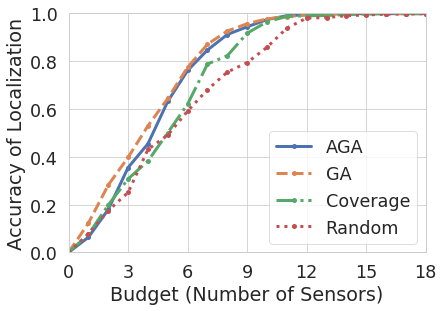

In [136]:
testbed_data= pd.read_csv('plot_data_splat/testbed_output', header=None, sep=' ')
testbed_data.loc[-1] = [0, 0, 0, 0, 0]
testbed_data.index = testbed_data.index + 1
testbed_data.sort_index(inplace=True)
plt.plot(range(0, 19), testbed_data[1].values, markersize=5, marker='o', linewidth=3, label='AGA', linestyle='-')
plt.plot(range(0, 19), testbed_data[2].values, markersize=5, marker='o', linewidth=3, label='GA', linestyle='--')
plt.plot(range(0, 19), testbed_data[3].values, markersize=5, marker='o', linewidth=3, label='Coverage', linestyle='-.')
plt.plot(range(0, 19), testbed_data[4].values, markersize=5, marker='o', linewidth=3, label='Random', linestyle=':')
plt.xlim([0, 18])
plt.ylim([0, 1.0])
plt.xticks(range(0, 19, 3))
plt.xlabel('Budget (Number of Sensors)')
plt.ylabel('Accuracy of Localization')
plt.legend()
plt.savefig('outdoor-testbed.pdf', bbox_inches='tight')

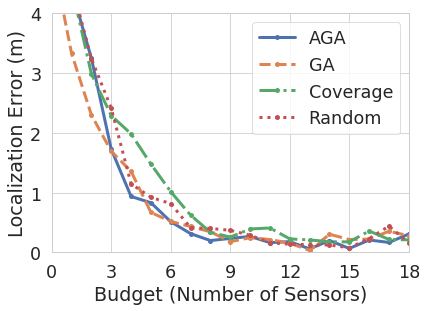

In [135]:
testbed_data= pd.read_csv('plot_data_splat/testbed_weighted_output', header=None, sep=' ')
testbed_data.loc[-1] = [0, 5, 5, 5, 5, 5, 5]
testbed_data.index = testbed_data.index + 1
testbed_data.sort_index(inplace=True)
plt.plot(range(0, 19), testbed_data[2].values, markersize=5, marker='o', linewidth=3, label='AGA', linestyle='-')
plt.plot(range(0, 19), testbed_data[3].values, markersize=5, marker='o', linewidth=3, label='GA', linestyle='--')
plt.plot(range(0, 19), testbed_data[4].values, markersize=5, marker='o', linewidth=3, label='Coverage', linestyle='-.')
plt.plot(range(0, 19), testbed_data[5].values, markersize=5, marker='o', linewidth=3, label='Random', linestyle=':')
plt.xlim([1, 18])
plt.ylim([0, 4.0])
plt.xticks(range(0, 19, 3))
plt.xlabel('Budget (Number of Sensors)')
plt.ylabel('Localization Error (m)')
plt.legend()
plt.savefig('outdoor-weighted-testbed.pdf', bbox_inches='tight')

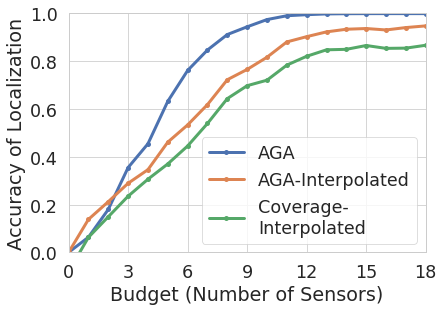

In [134]:
testbed_data= pd.read_csv('plot_data_splat/testbed_output', header=None, sep=' ')
testbed_data.loc[-1] = [0, 0, 0, 0, 0]
testbed_data.index = testbed_data.index + 1
testbed_data.sort_index(inplace=True)
acc_cov = np.array([0, 143, 229, 315, 386, 450, 525, 619, 723, 777, 800, 863, 900, 927, 929, 945, 933, 934, 946]) - 80

plt.plot(range(0, 19), testbed_data[1], markersize=5, marker='o', linewidth=3, label='AGA', linestyle='-')
plt.plot(range(0, 19), interp_AGA_acc, markersize=5, marker='o', linewidth=3, label='AGA-Interpolated', linestyle='-')
plt.plot(range(0, 19), acc_cov / 1000, markersize=5, marker='o', linewidth=3, label='Coverage-\nInterpolated', linestyle='-')
plt.xlim([0, 18])
plt.ylim([0, 1.0])
plt.xticks(range(0, 19, 3))
plt.xlabel('Budget (Number of Sensors)')
plt.ylabel('Accuracy of Localization')
plt.legend()
plt.savefig('outdoor-interp.pdf', bbox_inches='tight')